# Machine Learning - Classification

## Binary Classification for Churn Prediction

$$g(x_i) = y_i$$

**Where:**

- the result of $y_i$ will either be \{0, 1\} ---> between 0 - 1 as the likelihood of churn
- $x_i$ — feature vector for the i-th customer  
- 1 is positive (churn)
- 0 is negative (no churn)

## Data prep
- Download the data, read it with pandas
- Look at the data
- Make column names and values look uniform
- Check if all the columns read correctly
- Check if the churn variables needs any preparation

In [751]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [752]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [753]:
df = pd.read_csv(data)
len(df)

7043

In [754]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [755]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [756]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [757]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [758]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [759]:
df.totalcharges = pd.to_numeric(df['totalcharges'], errors='coerce')

In [760]:
df.totalcharges = df.totalcharges.fillna(0)

In [761]:
df.churn

0        no
1        no
2       yes
3        no
4       yes
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: churn, Length: 7043, dtype: object

In [762]:
# df.churn = df.churn.map({'yes': 1, 'no': 0}) # Convert to numerical

# df.churn = df.churn.apply(lambda x: 1 if x == 'yes' else 0) # Convert to numerical

# df.churn = df.churn.replace({'yes': 1, 'no': 0}) # Convert to numerical

df.churn = (df.churn == 'yes').astype(int)  # Convert to numerical - True/False to 1/0

# all these methods do the same thing

In [763]:
df.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

In [764]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu,9305-cdskc,1452-kiovk,6713-okomc,7892-pookp,6388-tabgu
gender,female,male,male,male,female,female,male,female,female,male
seniorcitizen,0,0,0,0,0,0,0,0,0,0
partner,yes,no,no,no,no,no,no,no,yes,no
dependents,no,no,no,no,no,no,yes,no,no,yes
tenure,1,34,2,45,2,8,22,10,28,62
phoneservice,no,yes,yes,no,yes,yes,yes,no,yes,yes
multiplelines,no_phone_service,no,no,no_phone_service,no,yes,yes,no_phone_service,yes,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic,fiber_optic,fiber_optic,dsl,fiber_optic,dsl
onlinesecurity,no,yes,yes,yes,no,no,no,yes,no,yes


## Setting up the validation framework
- Perform the train/validation/test split with Scikit-Learn

In [765]:
from sklearn.model_selection import train_test_split

In [766]:
# train_test_split? # This is to check the function signature and docstring and how large the default test size is

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1) # 20% for testing, 80% for training

In [767]:
len(df_full_train), len(df_test)

(5634, 1409)

In [768]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2, so 20% for validation, 60% for training, 20% for testing

In [769]:
len(df_train), len(df_val), len(df_test)   

(4225, 1409, 1409)

In [770]:
df_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
3897,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,...,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15,0
1980,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,...,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55,0
6302,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65,1
727,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10,0
5104,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3774,1309-xgfsn,male,1,yes,yes,52,yes,yes,dsl,no,...,yes,no,yes,yes,one_year,yes,electronic_check,80.85,4079.55,0
6108,4819-hjpiw,male,0,no,no,18,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,no,mailed_check,25.15,476.80,0
1530,3703-vavcl,male,0,yes,yes,2,yes,no,fiber_optic,no,...,yes,yes,no,yes,month-to-month,no,credit_card_(automatic),90.00,190.05,1
3701,3812-lrzir,female,0,yes,yes,27,yes,yes,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,electronic_check,24.50,761.95,0


In [771]:
df_train =df_train.reset_index(drop=True)
df_val =df_val.reset_index(drop=True)
df_test =df_test.reset_index(drop=True)

In [772]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [773]:
del df_train['churn']
del df_val['churn'] 
del df_test['churn']

## EDA
- Check missing values
- Look at the target variable (churn)
- Look at numerical and categorical variables

In [774]:
df_full_train = df_full_train.reset_index(drop=True)
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [775]:
df_full_train.churn.value_counts()
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [776]:
# in this binary dataset, the mean gives us the exact churn rate, exactly the same result as value_counts(normalize=True)
global_churn_rate = df_full_train.churn.mean()
print(round(global_churn_rate, 2)) # 27% of customers churn

0.27


In [777]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [778]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [779]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [780]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

### Feature importance: Churn rate and risk ratio
Feature importance analysis (part of EDA) - identifying which features affect our target variable
- Churn rate
- Risk ratio
- Mutual information - later

**Churn rate**

Churn rate within each group 

In [781]:
global_churn = df_full_train.churn.mean()
print('global churn rate:', global_churn)

global churn rate: 0.26996805111821087


In [782]:
churn_female =df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
print('female churn rate:', churn_female, '\n', 'male churn rate:', churn_male)

female churn rate: 0.27682403433476394 
 male churn rate: 0.2632135306553911


In [783]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
print('churn rate with partner:', churn_partner, '\n', 'churn rate without partner:', churn_no_partner)

churn rate with partner: 0.20503330866025166 
 churn rate without partner: 0.3298090040927694


In [784]:
global_churn - churn_partner

np.float64(0.06493474245795922)

In [785]:
global_churn - churn_no_partner

np.float64(-0.05984095297455855)

In [786]:
global_churn - churn_female

np.float64(-0.006855983216553063)

In [787]:
global_churn - churn_male

np.float64(0.006754520462819769)

The churn rate difference is higher for the partner feature than for the gender feature. This suggests that the partner feature is a better predictor of churn than the gender feature. (Partner variable is more important for churn prediction than the gender variable)

for the differences:

$$Global - Group$$
- $<0$ ==> more likely to churn
- $>0$ ==> less likely to churn

**Risk ratio**

In [788]:
churn_no_partner / global_churn

np.float64(1.2216593879412643)

In [789]:
churn_partner / global_churn

np.float64(0.7594724924338315)

for the risk ratio:

$$Risk = \frac{Group}{Global}$$
- $>1$ ==> more likely to churn
- $<1$ ==> less likely to churn

for churn_no_partner group, the risk ratio is greater than 1, meaning they are more likely to churn compared to the global average.

for churn_partner group, the risk ratio is less than 1, meaning they are less likely to churn compared to the global average.

churn_no_partner ==> High risk

churn_partner ==> Low risk

```sql
SELECT
    gender,
    AVG(churn),
    AVG(churn) - global_churn AS diff,
    AVG(churn) / global_churn AS risk
FROM data
GROUP BY gender;
```

In [790]:
from IPython.display import display

In [791]:
for c in categorical:
    print(c)
    df_group =df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


### Feature importance: Mutual information
Mutual information - concept from information theory, it tells us how much we can learn about one variable if we know the other value of another
- https://en.wikipedia.org/wiki/Mutual_information

In [792]:
from sklearn.metrics import mutual_info_score

In [793]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [794]:
mutual_info_score(df_full_train.gender, df_full_train.churn)

0.0001174846211139946

In [795]:
mutual_info_score(df_full_train.contract, df_full_train.churn)

0.0983203874041556

In [796]:
mutual_info_score(df_full_train.partner, df_full_train.churn)

0.009967689095399745

`Partner` is more important than `Gender`, but far less important than `Contract`, as we can see from mutual information scores.

The order of importance based on mutual information scores is:
Contract, Partner, Gender

In [797]:
# applying on all categorical features to see their importance levels in relation to churn

def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [798]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

`Contract` is the most important and `Gender` is the least important categorical feature in relation to churn

### Feature importance: Correlation
For numerical columns/variables/features
- Correlation coefficient - https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

In [799]:
df_full_train[numerical]

,tenure,monthlycharges,totalcharges
0,12,19.70,258.35
1,42,73.90,3160.55
2,71,65.15,4681.75
3,71,85.45,6300.85
4,30,70.40,2044.75
...,...,...,...
5629,9,100.50,918.60
5630,60,19.95,1189.90
5631,28,105.70,2979.50
5632,2,54.40,114.10


In [800]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

The negative correlation indicates that as the tenure / total charges increases, the likelihood of churn decreases.
The positive correlation indicates that as the monthly charges increase, the likelihood of churn increases

In [801]:
# testing 

df_full_train[df_full_train.tenure <= 2].churn.mean()

np.float64(0.5953420669577875)

if someone stays with the company for 0, 1 or 2 months, the churn rate is high

In [802]:
df_full_train[df_full_train.tenure > 2].churn.mean()

np.float64(0.22478269658378816)

if someone stays with the company for more than 2 months, the churn rate is low

In [803]:
# between 2 months and 1 year

df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

np.float64(0.3994413407821229)

In [804]:
# more than 1 year

df_full_train[df_full_train.tenure > 12].churn.mean()

np.float64(0.17634908339788277)

for monthlycharges (positive correlation with respect to churn)

In [805]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

np.float64(0.08795411089866156)

In [806]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()

np.float64(0.18340943683409436)

In [807]:
df_full_train[df_full_train.monthlycharges >= 50].churn.mean()

np.float64(0.3248223216635957)

In [808]:
# if we care about the importance not the direction

df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

`tenure` is more important than `monthlycharges` which is more important than `totalcharges`

## One-hot encoding
- Using Scikit-Learn to encode categorical features

In [809]:
from sklearn.feature_extraction import DictVectorizer

In [810]:
df_train[['gender', 'contract', 'tenure']].iloc[:100]

# 2 categorical and 1 numerical variables

,gender,contract,tenure
0,female,two_year,72
1,male,month-to-month,10
2,female,month-to-month,5
3,female,month-to-month,5
4,female,two_year,18
...,...,...,...
95,male,one_year,39
96,female,month-to-month,19
97,male,month-to-month,21
98,male,one_year,43


In [811]:
dicts = df_train[['gender', 'contract', 'tenure']].iloc[:100].to_dict(orient='records')
dicts

[{'gender': 'female', 'contract': 'two_year', 'tenure': 72},
 {'gender': 'male', 'contract': 'month-to-month', 'tenure': 10},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 5},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 5},
 {'gender': 'female', 'contract': 'two_year', 'tenure': 18},
 {'gender': 'male', 'contract': 'month-to-month', 'tenure': 4},
 {'gender': 'male', 'contract': 'month-to-month', 'tenure': 1},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 1},
 {'gender': 'female', 'contract': 'two_year', 'tenure': 72},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 6},
 {'gender': 'female', 'contract': 'two_year', 'tenure': 72},
 {'gender': 'male', 'contract': 'month-to-month', 'tenure': 17},
 {'gender': 'female', 'contract': 'two_year', 'tenure': 66},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 2},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 4},
 {'gender': 'male', 'contract': 'month-to

In [812]:
dv = DictVectorizer(sparse=False)

In [813]:
dv.fit(dicts)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [814]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'gender=female', 'gender=male', 'tenure'],
      dtype=object)

In [815]:
dv.transform(dicts)

array([[ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  0.,  1., 10.],
       [ 1.,  0.,  0.,  1.,  0.,  5.],
       [ 1.,  0.,  0.,  1.,  0.,  5.],
       [ 0.,  0.,  1.,  1.,  0., 18.],
       [ 1.,  0.,  0.,  0.,  1.,  4.],
       [ 1.,  0.,  0.,  0.,  1.,  1.],
       [ 1.,  0.,  0.,  1.,  0.,  1.],
       [ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  1.,  0.,  6.],
       [ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  0.,  1., 17.],
       [ 0.,  0.,  1.,  1.,  0., 66.],
       [ 1.,  0.,  0.,  1.,  0.,  2.],
       [ 1.,  0.,  0.,  1.,  0.,  4.],
       [ 1.,  0.,  0.,  0.,  1.,  3.],
       [ 0.,  0.,  1.,  1.,  0., 71.],
       [ 1.,  0.,  0.,  1.,  0., 32.],
       [ 0.,  1.,  0.,  0.,  1., 53.],
       [ 0.,  0.,  1.,  0.,  1., 56.],
       [ 1.,  0.,  0.,  0.,  1., 61.],
       [ 0.,  1.,  0.,  1.,  0., 41.],
       [ 1.,  0.,  0.,  1.,  0.,  1.],
       [ 0.,  0.,  1.,  1.,  0.,  3.],
       [ 1.,  0.,  0.,  0.,  1.,  3.],
       [ 0.,  0.,  1.,  0

_DictVectorizer is smart to handle both categorical variables but leave numerical variables as it is_

In [816]:
# now working on the full train dataset, validation dataset

dv = DictVectorizer(sparse=False)

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

## Logistic Regression
- Binary classification
- Linear vs Logistic regression

$$g(x_i) = \text{sigmoid}(w_0 + x_i^{T}w)$$

**or equivalently:**

$$g(x_i) = \frac{1}{1 + e^{-(w_0 + x_i^{T}w)}}$$


**Where:**

- $g(x_i)$ — predicted probability that $y_i = 1$  
- $w_0$ — intercept (bias term)  
- $x_i^{T}$ — transpose of the i-th feature vector  
- $w$ — weight vector  
- $e$ — base of the natural logarithm  
- The output $g(x_i)$ is always in the range $(0, 1)$


$$\text{sigmoid}(z) = \frac{1}{1 + e^{-z}}$$

$$z = w_0 + x_i^{T}w$$

**Where:**

- $z$ — linear combination of weights and inputs  


In [817]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [818]:
# for example...

z = np.linspace(-7, 7, 51)

In [819]:
sigmoid(z)

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

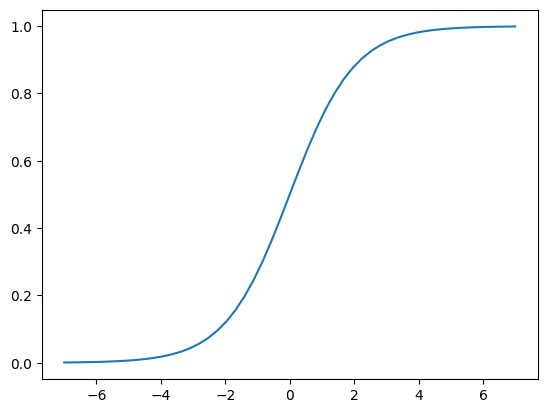

In [820]:
plt.plot(z, sigmoid(z))

In [821]:
## For example

sigmoid(10000) # anything large positive goes to 1. it asymptotically approaches 1 or 0 for large negative values 

# sigmoid is used to convert linear outputs (or scores) into probabilities between 0 and 1

np.float64(1.0)

$$\text{sigmoid} ===> \text{from scores to probability}$$

In [822]:
# in linear regression...

def linear_regression(xi):
    result = w0

    for j in range(len(w)):
        result += w[j] * xi[j]

    return result

In [823]:
# while in logistic regression, we apply the sigmoid function to the linear regression output to get probabilities

def logistic_regression(xi):
    score = w0

    for j in range(len(w)):
        score += w[j] * xi[j]

    result = sigmoid(score)
    return result

## Training logistic regression with Scikit-Learn
- Training a model with Scikit-Learn
- Applying it to the validation dataset
- Calculating the accuracy

In [824]:
from sklearn.linear_model import LogisticRegression

In [825]:
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\Jo$h\Desktop\Visual Studio Code\Machine Learning\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [826]:
model.intercept_[0]

np.float64(-0.10910575411731115)

In [827]:
model.coef_[0].round(3)

array([ 0.476, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.336,  0.317, -0.089,  0.004, -0.258,  0.142,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.123, -0.166,  0.059, -0.087, -0.032,  0.07 , -0.059,  0.142,
       -0.25 ,  0.216, -0.121, -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [828]:
model.predict_proba(X_train) 

# this shows the probabilities for both classes (0 and 1) for each instance in the training set... 
# that's the probability of not churn (class 0) on the left and churn (class 1) on the right
# also called soft predictions

# so we are interested in the right column for churn probabilities

array([[0.90452492, 0.09547508],
       [0.32058285, 0.67941715],
       [0.36630247, 0.63369753],
       ...,
       [0.46766799, 0.53233201],
       [0.95761329, 0.04238671],
       [0.3012034 , 0.6987966 ]], shape=(4225, 2))

In [829]:
y_pred = model.predict_proba(X_val)[:, 1] # getting the probabilities for class 1 (churn)
y_pred

array([0.00896799, 0.20454216, 0.21215178, ..., 0.1363222 , 0.79995367,
       0.83758207], shape=(1409,))

In [830]:
# doing the hard predictions/decisions

churn_decision = (y_pred >= 0.5)
churn_decision

array([False, False, False, ..., False,  True,  True], shape=(1409,))

In [831]:
df_val[churn_decision]

# these are the customers predicted to churn .. so we can send them promotional emails with a discount so that they don't churn

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
3,8433-wxgna,male,0,no,no,2,yes,no,fiber_optic,yes,no,no,no,no,no,month-to-month,yes,electronic_check,75.70,189.20
8,3440-jpscl,female,0,no,no,6,yes,no,fiber_optic,no,no,yes,yes,yes,yes,month-to-month,yes,mailed_check,99.95,547.65
11,2637-fkfsy,female,0,yes,no,3,yes,no,dsl,no,no,no,no,no,no,month-to-month,yes,mailed_check,46.10,130.15
12,7228-omtpn,male,0,no,no,4,yes,no,fiber_optic,no,no,no,no,yes,yes,month-to-month,yes,electronic_check,88.45,370.65
19,6711-fldfb,female,0,no,no,7,yes,yes,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,74.90,541.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,5976-jcjrh,male,0,yes,no,10,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,70.30,738.20
1398,2034-cgrhz,male,1,no,no,24,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,month-to-month,yes,credit_card_(automatic),102.95,2496.70
1399,5276-kqwhg,female,1,no,no,2,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,69.60,131.65
1407,6521-yytyi,male,0,no,yes,1,yes,yes,fiber_optic,no,no,no,no,yes,yes,month-to-month,yes,electronic_check,93.30,93.30


In [832]:
# let's see how accurate our predictions are

In [833]:
y_val

array([0, 0, 0, ..., 0, 1, 1], shape=(1409,))

In [834]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1], shape=(1409,))

In [835]:
y_val == churn_decision.astype(int)

array([ True,  True,  True, ...,  True,  True,  True], shape=(1409,))

In [836]:
(y_val == churn_decision.astype(int)).mean()  # accuracy    

np.float64(0.8026969481902059)

In [837]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [838]:
df_pred

,probability,prediction,actual
0,0.008968,0,0
1,0.204542,0,0
2,0.212152,0,0
3,0.543024,1,1
4,0.213658,0,0
...,...,...,...
1404,0.313711,0,0
1405,0.039280,0,1
1406,0.136322,0,0
1407,0.799954,1,1


In [839]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [840]:
df_pred

,probability,prediction,actual,correct
0,0.008968,0,0,True
1,0.204542,0,0,True
2,0.212152,0,0,True
3,0.543024,1,1,True
4,0.213658,0,0,True
...,...,...,...,...
1404,0.313711,0,0,True
1405,0.039280,0,1,False
1406,0.136322,0,0,True
1407,0.799954,1,1,True


In [841]:
df_pred.correct.mean()  # accuracy again

np.float64(0.8026969481902059)

The model is about 80% accurate

## Model Interpretation
- Looking at the coefficients
- Training a smaller model with fewer features

In [842]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [843]:
model.coef_[0].round(3)

array([ 0.476, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.336,  0.317, -0.089,  0.004, -0.258,  0.142,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.123, -0.166,  0.059, -0.087, -0.032,  0.07 , -0.059,  0.142,
       -0.25 ,  0.216, -0.121, -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [844]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

# here's how zip works: 

# for example

# list(zip(['a', 'b', 'c'], [1, 2, 3]))

# would return [('a', 1), ('b', 2), ('c', 3)]

# or if we want to turn to a dictionary, we can use dict(zip(['a', 'b', 'c'], [1, 2, 3]))

# which would return {'a': 1, 'b': 2, 'c': 3}

{'contract=month-to-month': np.float64(0.476),
 'contract=one_year': np.float64(-0.175),
 'contract=two_year': np.float64(-0.408),
 'dependents=no': np.float64(-0.03),
 'dependents=yes': np.float64(-0.078),
 'deviceprotection=no': np.float64(0.063),
 'deviceprotection=no_internet_service': np.float64(-0.089),
 'deviceprotection=yes': np.float64(-0.081),
 'gender=female': np.float64(-0.034),
 'gender=male': np.float64(-0.073),
 'internetservice=dsl': np.float64(-0.336),
 'internetservice=fiber_optic': np.float64(0.317),
 'internetservice=no': np.float64(-0.089),
 'monthlycharges': np.float64(0.004),
 'multiplelines=no': np.float64(-0.258),
 'multiplelines=no_phone_service': np.float64(0.142),
 'multiplelines=yes': np.float64(0.009),
 'onlinebackup=no': np.float64(0.063),
 'onlinebackup=no_internet_service': np.float64(-0.089),
 'onlinebackup=yes': np.float64(-0.081),
 'onlinesecurity=no': np.float64(0.266),
 'onlinesecurity=no_internet_service': np.float64(-0.089),
 'onlinesecurity=yes'

In [845]:
# this gives us the feature names along with their corresponding coefficients (weights) from the logistic regression model

In [846]:
small = ['contract', 'tenure', 'monthlycharges']

In [847]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [848]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [849]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [850]:
dv_small.get_feature_names_out()    

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [851]:
X_train_small = dv_small.transform(dicts_train_small)

In [852]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [853]:
w0 = model_small.intercept_[0]
w0

np.float64(-2.477957596026966)

In [854]:
w = model_small.coef_[0]
w.round(3)

array([ 0.971, -0.024, -0.948,  0.027, -0.036])

In [855]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': np.float64(0.971),
 'contract=one_year': np.float64(-0.024),
 'contract=two_year': np.float64(-0.948),
 'monthlycharges': np.float64(0.027),
 'tenure': np.float64(-0.036)}

$$g(x_i) = \text{sigmoid}(w_0 + x_i^{T}w)$$

**taking a customer as an example:**

```python
random_customer = {
    'contract': 'month-to-month',
    'tenure': 1,
    'monthlycharges': 70
}
```
in that case, contract=month-to-month, will be 1, contract=one_year and contract=two_year will be 0, tenure=1, monthlycharges=70

In [856]:
# so applying it to the formula for logistic regression:,

-2.47796 + (1 * 0.971) + (0 * -0.024) + (0 * -0.948) + (70 * 0.027) + (1 * -0.036)

0.34704000000000007

In [857]:
sigmoid(_)

np.float64(0.5858996030718663)

The probability of this user churning is about 59%

**taking another customer as an example:**

```python
random_customer = {
    'contract': 'two_year',
    'tenure': 24,
    'monthlycharges': 30
}
```
in that case, contract=two_year, will be 1, contract=one_year and contract=month-to-month will be 0, tenure=24, monthlycharges=30

In [858]:
-2.47796 + (0 * 0.971) + (0 * -0.024) + (1 * -0.948) + (30 * 0.027) + (24 * -0.036)

-3.4799599999999997

In [859]:
sigmoid(_)

np.float64(0.0298878395640918)

The probability of this user churning is about 3%

## Using the model

In [860]:
df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5630,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
5631,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
5632,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


In [861]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [862]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [863]:
y_full_train = df_full_train.churn.values

In [864]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

c:\Users\Jo$h\Desktop\Visual Studio Code\Machine Learning\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [865]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [866]:
X_test = dv.transform(dicts_test)

In [867]:
y_pred = model.predict_proba(X_test)[:, 1]

In [868]:
churn_decision = (y_pred >= 0.5)

In [869]:
(churn_decision == y_test).mean() # accuracy of the model on the test set

np.float64(0.8140525195173882)

In [870]:
# using the model on any customer data point

customer = dicts_test[10]
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [871]:
X_small = dv.transform([customer])

In [872]:
model.predict_proba(X_small)[0, 1]

# probability of the customer to churn

np.float64(0.4965472633435293)

In [873]:
y_test[10]

np.int64(0)

In [874]:
# another customer

customer = dicts_test[-1]
customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [875]:
X_small = dv.transform([customer])

In [876]:
model.predict_proba(X_small)[0, 1]

# probability of the customer to churn

np.float64(0.6584201121103557)

In [877]:
y_test[-1]

np.int64(1)